PROJECT 1

Description:  You should consider yourself as a
new employee in a company who has just been given a data. Your job is to make a useful description of the data set for your co-workers and make some basic plots.

Import relevant packages

In [198]:
# Import relevant packages
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

# 1.  Description of you dataset

• Explain the overall problem of interest and the associated data.  

• Provide a reference to where you obtained the data.  

• Summarize previous analysis of the data. (i.e. go through one or two of the original source papers and read what they did to the data and summarize their results).  


• You will be asked to apply (1) classification and (2) regression on your data in the next report. For now, we want you to consider how this should be done. Therefore:  

– Explain, in the context of your problem of interest, what you hope to accomplish/learn from the data using these techniques?  

– Explain which attribute you wish to predict in the regression based on which other attributes?  

– Which class label will you predict based on which other attributes in the classification task?  

– Explain if you need to transform individual attribues in order to carry out these tasks (e.g. centering, standardization, discretization, log transform, etc.) and how you plan to do this.  

One of these tasks is likely more relevant than the rest and will be denoted the main machine learning aim in the following.
The purpose of the following questions, which asks you to describe/visualize the data, is to allow you to reflect on the feasibility of the main machine learning aim

Load relevant data

In [199]:
# Load the data

columns = [
    'Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class'
]

df = pd.read_fwf("data/ecoli.data", header =None, names = columns)
print(df.head())


  Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


# 2. Detailed explanation of the attributes of the data

• Describe if the attributes are discrete/continuous and whether they are nominal/ordinal/interval/ratio.  

• Give an account of whether there are data issues (i.e. missing values or corrupted data) and describe them if so and how you will handle them.  

• Include relevant summary statistics of the attributes. Reflect on the values.  

If your data set contains many similar attributes, you may restrict yourself to describing a few representative features (apply common sense). You can place additional results in the
appendix if needed

### Summary statistics of attributes


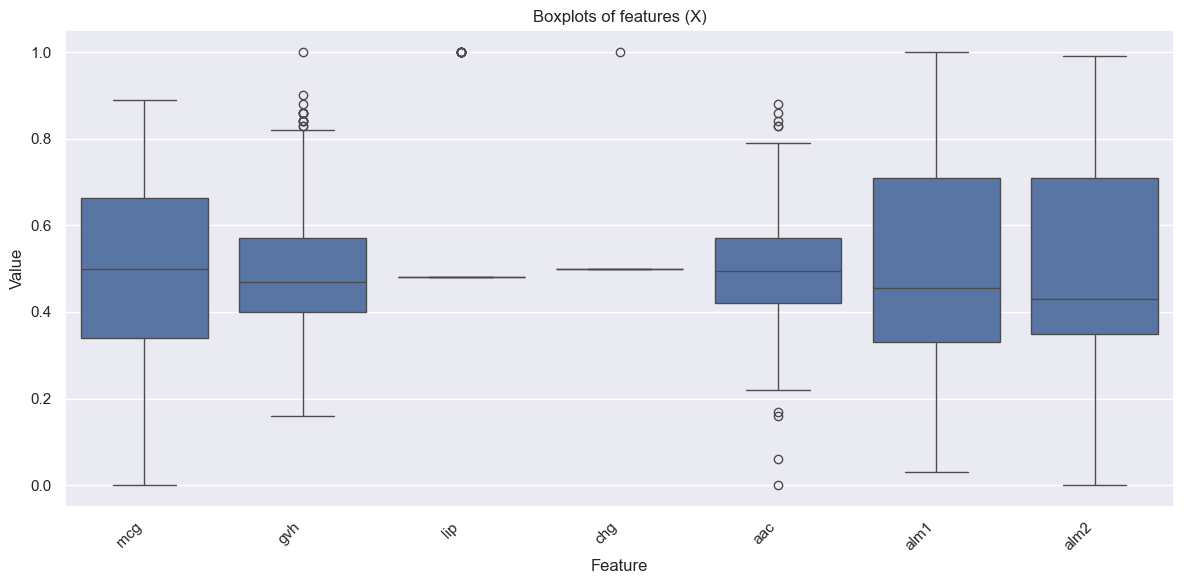

In [200]:
# YOUR CODE HERE
groups = df.groupby('class')
classes = df['class'].unique()

X = df.drop(columns=['Sequence Name', 'class'])
y = df['class']


# Melt to long form for seaborn boxplot
X_melt = X.melt(var_name='feature', value_name='value')
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_melt, x='feature', y='value')
plt.title('Boxplots of features (X)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we see from the boxplot, all the value for "lip" and "chg" are 0.5 with few outliers at 1.0. We will therefore not include lip and chg in further analysis. 

Also, we removed the sequence name from the attributes, as this is just the unique name for each protein.

## Make summary statistics on attributes

In [201]:
# Include summary statistics of the attributes
print(X.describe())

#X = X.drop(columns=['lip', 'chg'])

              mcg         gvh         lip         chg         aac        alm1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    0.160000    0.480000    0.500000    0.000000    0.030000   
25%      0.340000    0.400000    0.480000    0.500000    0.420000    0.330000   
50%      0.500000    0.470000    0.480000    0.500000    0.495000    0.455000   
75%      0.662500    0.570000    0.480000    0.500000    0.570000    0.710000   
max      0.890000    1.000000    1.000000    1.000000    0.880000    1.000000   

             alm2  
count  336.000000  
mean     0.499732  
std      0.209411  
min      0.000000  
25%      0.350000  
50%      0.430000  
75%      0.710000  
max      0.990000  


It is clear that the data has beome standardized with a mean of 0.5 and a min, max of 0 , 1. 

In [202]:
df = df.drop(columns=['Sequence Name'])
X = df.drop(columns=['class'])
X = X.to_numpy()
y = df['class']

# 3. Data visualization(s) based on suitable visualization techniques

Touch upon the following aspects, use visualizations when it appears sensible. Keep in mind the ACCENT principles and Tufte’s guidelines when you visualize the data.


• Are there issues with extreme values or outliers in the data?  

• How are the individual attributes distributed (e.g. normally distributed)?  

• Are the attributes correlated?  

There are three aspects that needs to be addressed when you carry out the PCA analysis for the report: 

• The principal directions of the considered PCA components. Plot and interpret the components in terms of the attributes.  

• The amount of variance explained as a function of the number of PCA components included.  

• The data projected onto the considered principal components, e.g. in 2D scatter plots (hint: it may be helpful to color code the points according to the value of the attribute
you wish to predict).  

Hint: If your attributes have very different scales, it may be helpful to standardized the
data prior to the PC

### Scatter plot

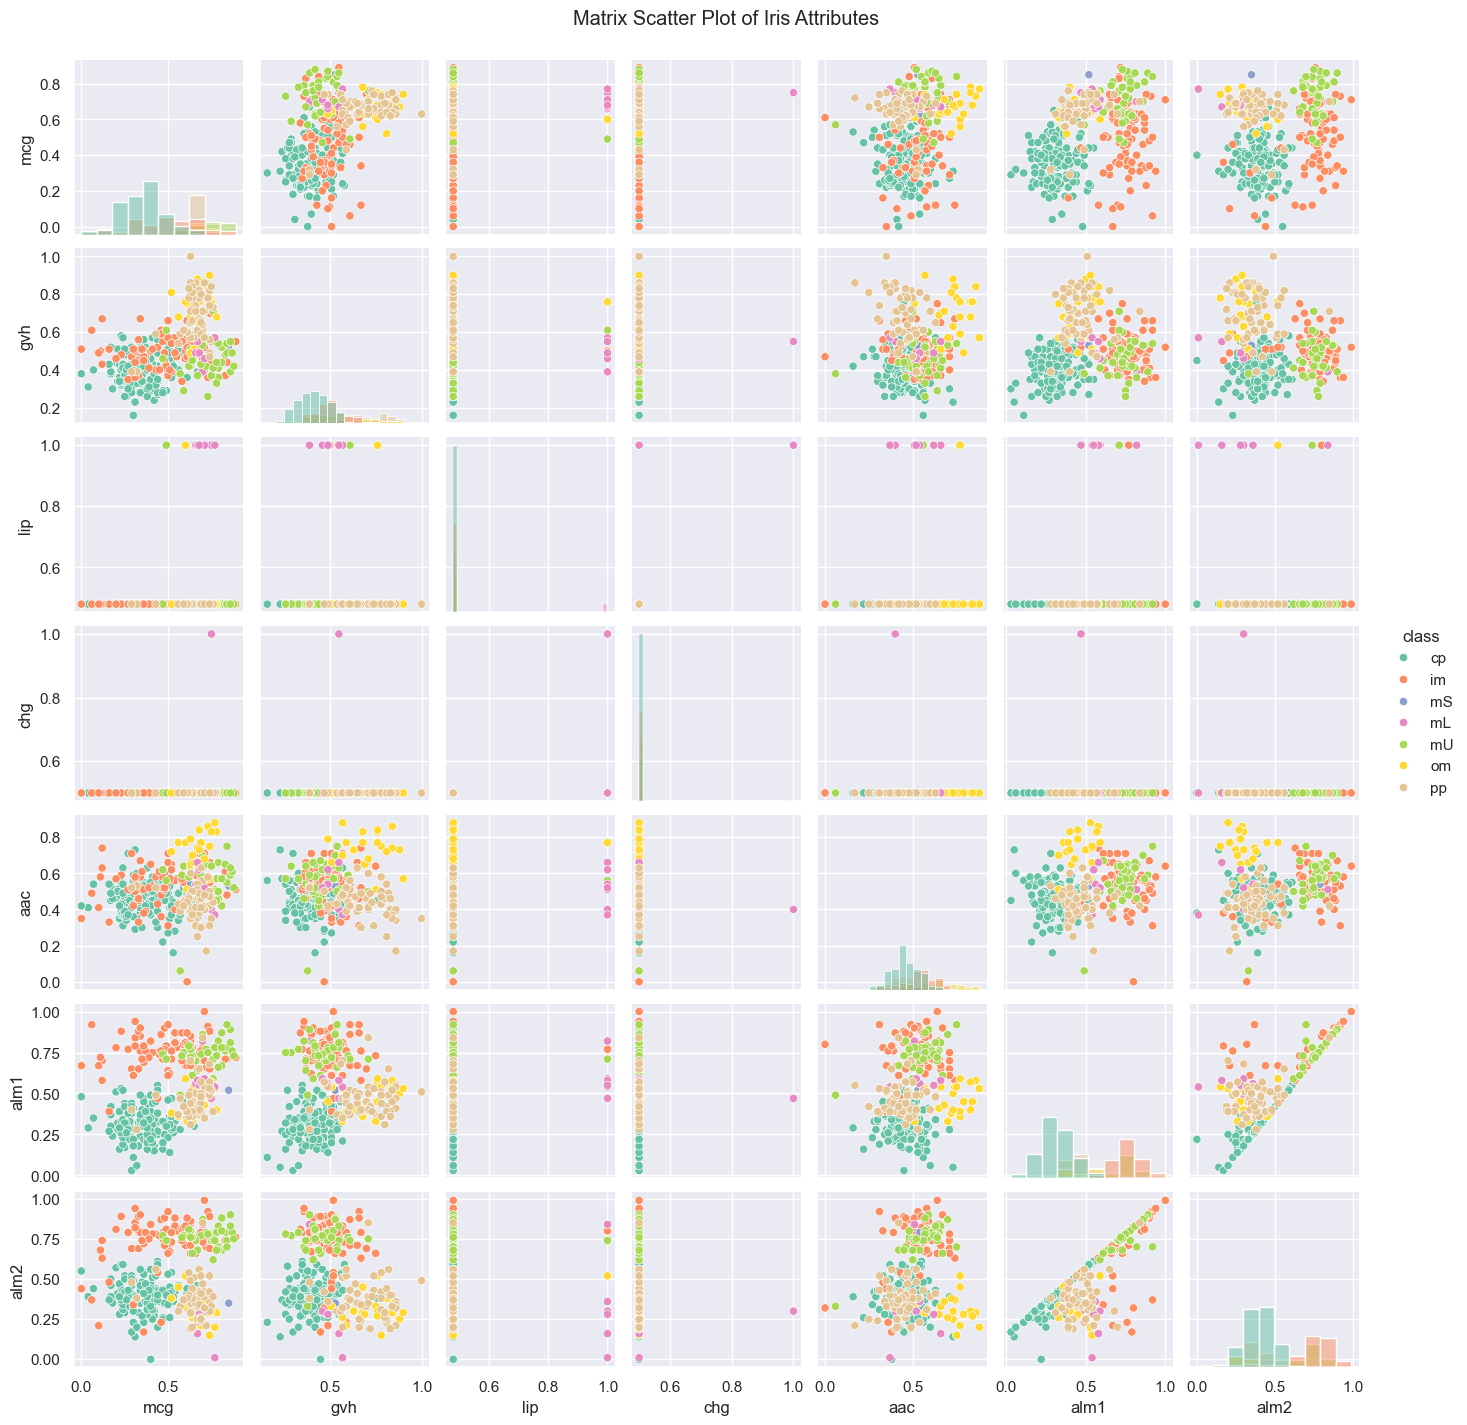

In [203]:
# Or alternatively using Seaborn's pairplot which is more convenient for quick visualizations.
sns.pairplot(df, hue="class", palette="Set2", diag_kind="hist", height=2.)
plt.suptitle("Matrix Scatter Plot of Iris Attributes", y=1.02)
plt.show()

### PCA Analysis


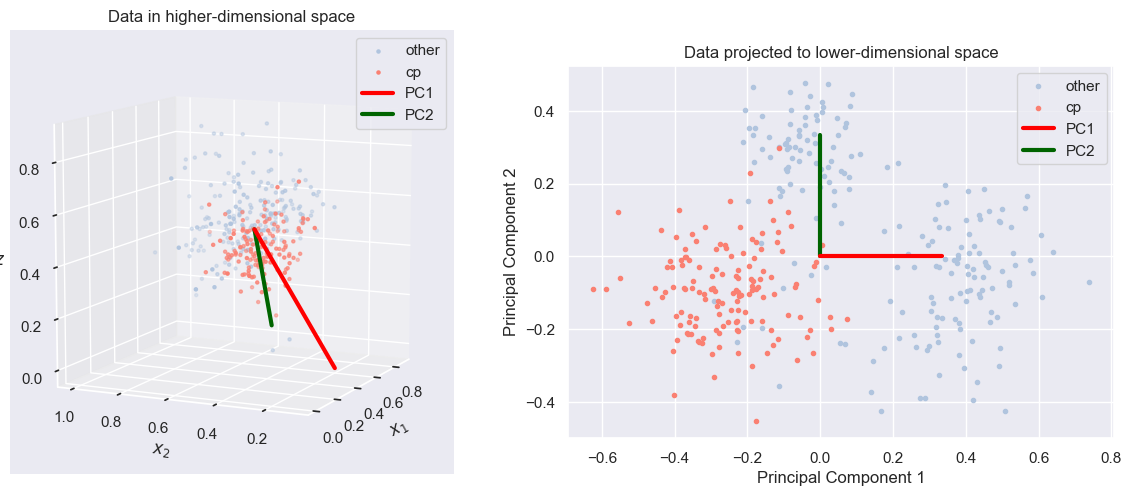

In [204]:
# Create PCA object
pca = PCA()
K = 2
M = 4

# Fit and transform the data to get B
# Get the principal components, V_K
### BEGIN SOLUTION
# Fit and transform the data
B = pca.fit_transform(X)
# Get the principal components
V_K = pca.components_.T[:, :K] # transpose to get PCs as columns
### END SOLUTION

# Define colors for the principal components
colors = ['red', 'darkgreen', 'orange']

# Create figure and subplot for high-dimensional data
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Data in higher-dimensional space')
ax.view_init(elev=10, azim=-155) # viewing parameters

# Plot the high dimensional data, X - and the principal components, V_K, as lines. 
### BEGIN SOLUTION

# y can be a pandas Series or a numpy array of class labels
mask = (y == 'cp')
try:
    mask = mask.to_numpy()  # if y is a pandas Series
except AttributeError:
    pass

# First plot non-cp in light blue, then cp in red (so red is on top)
ax.scatter(X[~mask, 0], X[~mask, 1], X[~mask, 4], c='lightsteelblue', marker='.', label='other')
ax.scatter(X[mask, 0], X[mask, 1], X[mask, 4], c='salmon', marker='.', label='cp')
ax.legend()

# Plot lines indicating the principal components
for i, pc in enumerate(V_K.T):
    ax.plot([0.5, pc[0]], [0.5, pc[1]], [0.5, pc[2]], color=colors[i], lw=3, label=f'PC{i+1}', zorder=5-i)
### END SOLUTION

# Figure layout
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')
ax.set_aspect('equal')
ax.legend()

# Create subplot for projected data
ax = fig.add_subplot(122)
ax.set_title('Data projected to lower-dimensional space')

# Plot the projected data, B, in 2D - along with the principal components in the projected space (which are just the standard basis vectors in 2D).
### BEGIN SOLUTION
ax.scatter(B[~mask, 0], B[~mask, 1], c='lightsteelblue', marker='.', label='other')
ax.scatter(B[mask, 0], B[mask, 1], c='salmon', marker='.', label='cp')
# Plot lines indicating the principal components in the projected space
for i, pc in enumerate(np.eye(2)): # The projected PCs are just the standard basis in 2D
    ax.plot([0, pc[0]/3], [0, pc[1]/3], color=colors[i], lw=3, label=f'PC{i+1}', zorder=5-i)
### END SOLUTION

# Figure layout
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_aspect('equal')
ax.legend()

plt.tight_layout()
plt.show()

## Explained Variance

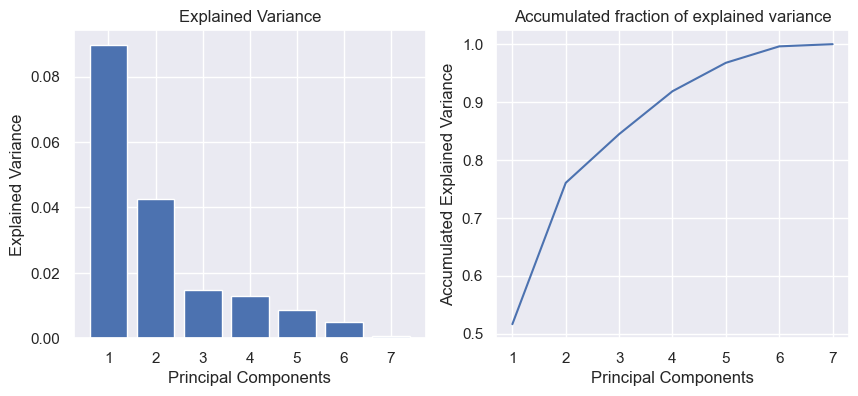

In [207]:
# Explained variance plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Explained Variance')
axs[0].set_xlabel('Principal Components')
axs[0].set_ylabel('Explained Variance')

# Bar plot for explained variance
### BEGIN SOLUTION
axs[0].bar(range(1, 7+1), pca.explained_variance_)
### END SOLUTION

# Accumulated explained variance plot
axs[1].set_title('Accumulated fraction of explained variance')
axs[1].set_xlabel('Principal Components')
axs[1].set_ylabel('Accumulated Explained Variance')

# Line plot for accumulated explained variance
### BEGIN SOLUTION
axs[1].plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_.cumsum())

# After your plotting calls
axs[0].set_xticks(np.arange(1, 7 + 1))  # 1..7 for bar plot
axs[1].set_xticks(np.arange(1, 7 + 1))  # 1..7 for line plot
### END SOLUTION
plt.show()

## PCA Attributes


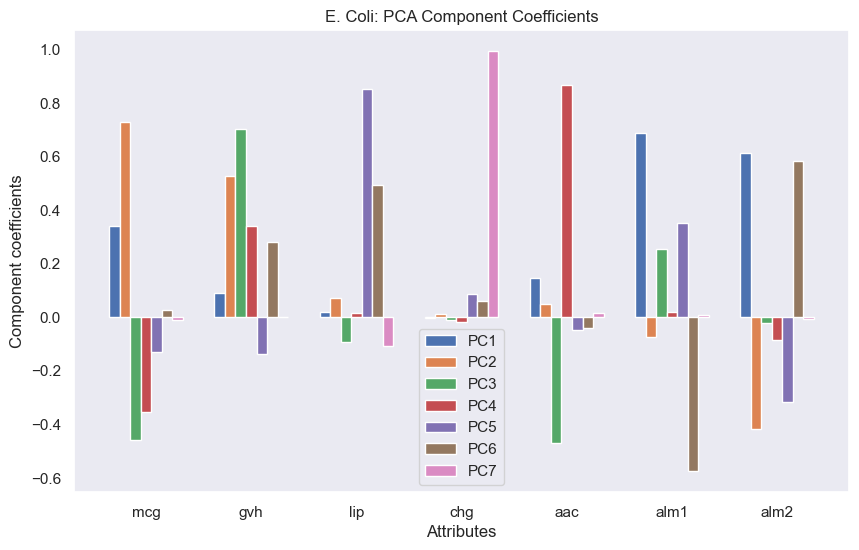

In [206]:
bw = 0.1
feature_names = ['mcg','gvh','lip','chg','aac','alm1','alm2']  # put your actual feature list here
r = np.arange(1, len(feature_names) + 1)

pcs = pca.components_  # shape (K, n_features)

fig = plt.figure(figsize=(10, 6))
plt.title("E. Coli: PCA Component Coefficients")
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + (len(pcs)-1)*bw/2, feature_names)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()